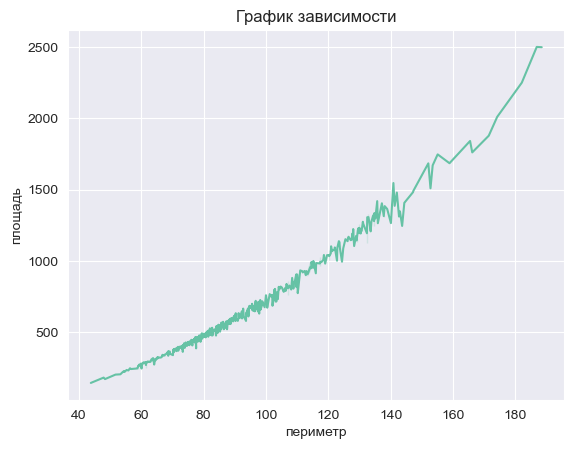

Среднеквадратическая ошибка = 5399.031199036194


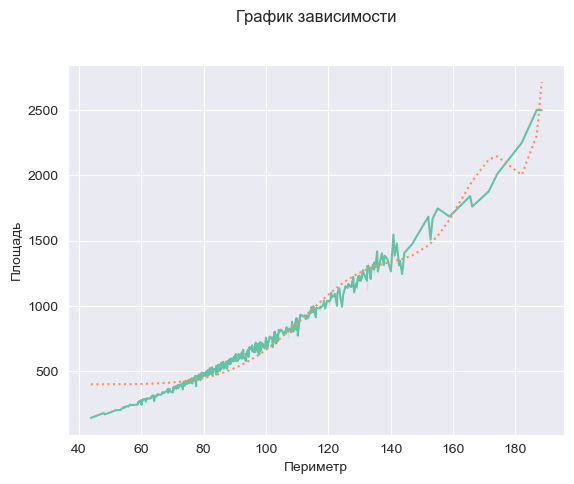

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PATH = "Breast_cancer_data.csv"
DATASET_SIZE = 10000
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot( 
    x=dataset["mean_perimeter"],
    y=dataset["mean_area"],
)
plt.title('График зависимости')
plt.xlabel('периметр')
plt.ylabel('площадь')
plt.show()

x = np.array(dataset["mean_perimeter"]).reshape(-1, 1)
y = np.array(dataset["mean_area"]).reshape(-1, 1)

DEGREES = 16
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

sns.lineplot( x=dataset["mean_perimeter"], y=dataset["mean_area"], linestyle="solid" )
sns.lineplot( x=dataset["mean_perimeter"], y=predictions.reshape(-1), linestyle="dotted" )
plt.title( 'График зависимости\n\n')
plt.xlabel('Периметр')
plt.ylabel('Площадь')
plt.show()
